In [1]:
from common import plot_standings_v2, NWSL
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
week = 2
year = 2023

In [3]:
df = pd.read_csv("data/" + str(year) + "/1.csv", index_col=0)[["rank"]].rename(
    columns={"rank": "1"}
)
for i in range(2, week + 1):
    df_new = pd.read_csv("data/" + str(year) + "/" + str(i) + ".csv", index_col=0)[
        ["rank"]
    ].rename(columns={"rank": str(i)})
    df = df.join(df_new)
df

,1,2
team,,
POR,1,1
SD,2,2
NJNY,3,6
NC,4,8
WAS,5,3
LOU,6,9
HOU,7,4
CHI,8,10
LA,9,7


In [4]:
# Create fake data for the standings table
df_table = pd.read_csv("data/" + str(year) + "/" + str(week) +".csv", index_col=0)
df_table

,rank,PTS,MP,W,L,D,GF,GA,GD
team,,,,,,,,,
POR,1,6,2,2,0,0,8,1,7
SD,2,6,2,2,0,0,6,3,3
WAS,3,4,2,1,0,1,3,2,1
HOU,4,4,2,1,0,1,2,1,1
RGN,5,3,2,1,1,0,2,1,1
NJNY,6,3,2,1,1,0,2,3,-1
LA,7,3,2,1,1,0,3,3,0
NC,8,3,2,1,1,0,2,3,-1
LOU,9,2,2,0,0,2,2,2,0


/home/agale/nwsl-analytics/src/common/plot_standings.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


<Figure size 432x288 with 0 Axes>

<Figure size 1920x1350 with 0 Axes>

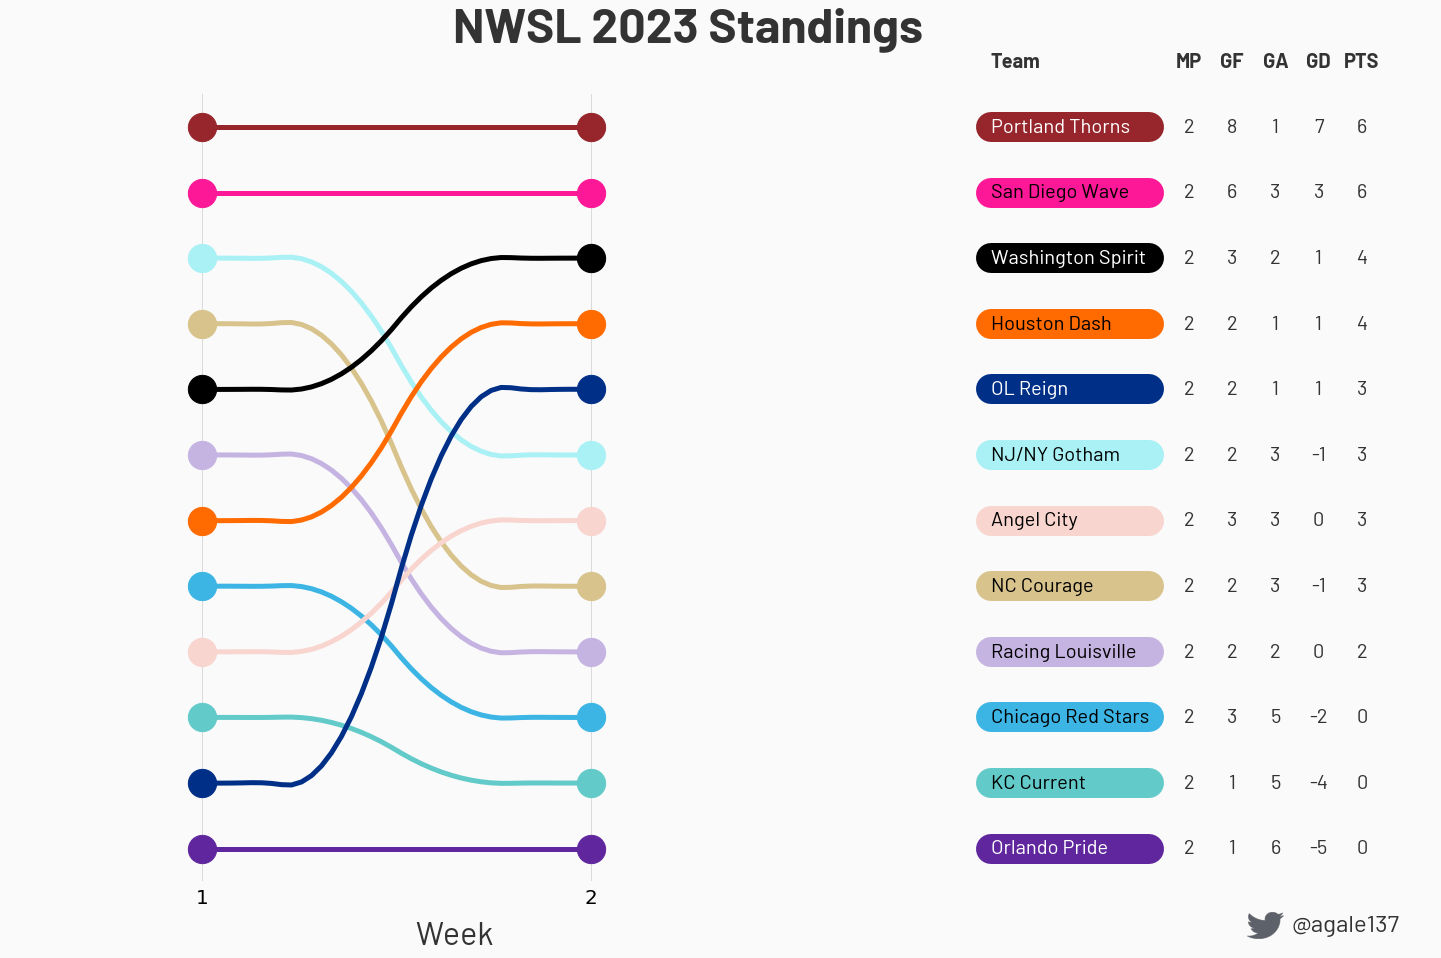

In [5]:
plot_standings_v2(
    df,
    df_table[["MP", "GF", "GA", "GD", "PTS"]],
    folder="images/" + str(year),
    names=NWSL.NAMES,
    colors=NWSL.COLORS,
    text_colors=NWSL.TEXT_COLORS,
    title="NWSL " + str(year) + " Standings",
    label_width=0.44,
    twitter_x=0.9,
    cubic_p=0.25,
)